In [1]:
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#### seed값 설정

In [2]:
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

#### 학습셋과 테스트셋 지정하기

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

#### 데이터 전처리 ( 감성분류 >> 원-핫 인코딩 과정 없음)

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

#### 모델의 설정 - Dense, Activation 분리

In [15]:
model = Sequential()
model.add(Embedding(5000,100))  # 5000개 단어 maxlen 100개 단위 맞춤
model.add(Dropout(0.5))         # 전체 50% 단어만 random tkdyd
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))   # 5개 단위의 1차원 filter 사용
model.add(MaxPooling1D(pool_size=4))  
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

#### 모델의 설정 - Dense, Activatin 통합

In [7]:
model = Sequential()
model.add(Embedding(5000,100))  # 5000개 단어 maxlen 100개 단위 맞춤
model.add(Dropout(0.5))         # 전체 50% 단어만 random tkdyd
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))   # 5개 단위의 1차원 filter 사용
model.add(MaxPooling1D(pool_size=4))  
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                      

#### 모델의 컴파일

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### 모델 실행

In [9]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 9s 23ms/step - loss: 0.4499 - accuracy: 0.7684 - val_loss: 0.3647 - val_accuracy: 0.8406
Epoch 2/5
250/250 [==============================] - 5s 20ms/step - loss: 0.2986 - accuracy: 0.8746 - val_loss: 0.3359 - val_accuracy: 0.8560
Epoch 3/5
250/250 [==============================] - 5s 21ms/step - loss: 0.2559 - accuracy: 0.8958 - val_loss: 0.3309 - val_accuracy: 0.8560
Epoch 4/5
250/250 [==============================] - 5s 21ms/step - loss: 0.2193 - accuracy: 0.9117 - val_loss: 0.3292 - val_accuracy: 0.8548
Epoch 5/5
250/250 [==============================] - 5s 20ms/step - loss: 0.1867 - accuracy: 0.9279 - val_loss: 0.3516 - val_accuracy: 0.8531


#### 테스트 정확도 출력

In [10]:
print('/n Test Accuracy: %.4f'%(model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 5s 6ms/step - loss: 0.3516 - accuracy: 0.8531
/n Test Accuracy: 0.8531


#### 테스트 셋의 오차

In [11]:
y_vloss = history.history['val_loss']

#### 학습셋의 오차

In [12]:
y_loss = history.history['loss']

#### 그래프로 표현

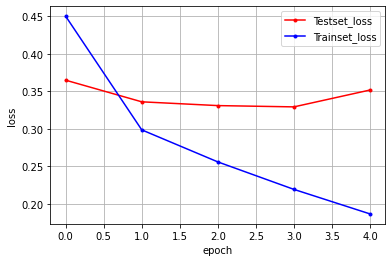

In [13]:
x_len = np.arange(len(y_loss))  # epoch >> x축으로
plt.plot(x_len, y_vloss, marker='.', c='r', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='b', label='Trainset_loss')

# 그래프에 그리드 및 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()